In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb


In [8]:
df=pd.read_csv("https://raw.githubusercontent.com/edyoda/data-science-complete-tutorial/master/Data/house_rental_data.csv.txt")
df


,Unnamed: 0,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
0,1,1177.698,2,7,2,2,2,62000
1,2,2134.800,5,7,4,2,2,78000
2,3,1138.560,5,7,2,2,1,58000
3,4,1458.780,2,7,3,2,2,45000
4,5,967.776,11,14,3,2,2,45000
...,...,...,...,...,...,...,...,...
640,644,1359.156,7,15,3,2,2,45000
641,645,377.148,4,10,1,1,1,24800
642,646,740.064,13,14,1,1,1,45000
643,647,1707.840,3,14,3,2,2,65000


In [10]:
df=df.set_index("Unnamed: 0")
df

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
Unnamed: 0,,,,,,,
1,1177.698,2,7,2,2,2,62000
2,2134.800,5,7,4,2,2,78000
3,1138.560,5,7,2,2,1,58000
4,1458.780,2,7,3,2,2,45000
5,967.776,11,14,3,2,2,45000
...,...,...,...,...,...,...,...
644,1359.156,7,15,3,2,2,45000
645,377.148,4,10,1,1,1,24800
646,740.064,13,14,1,1,1,45000


# dependency between each of the attributes:

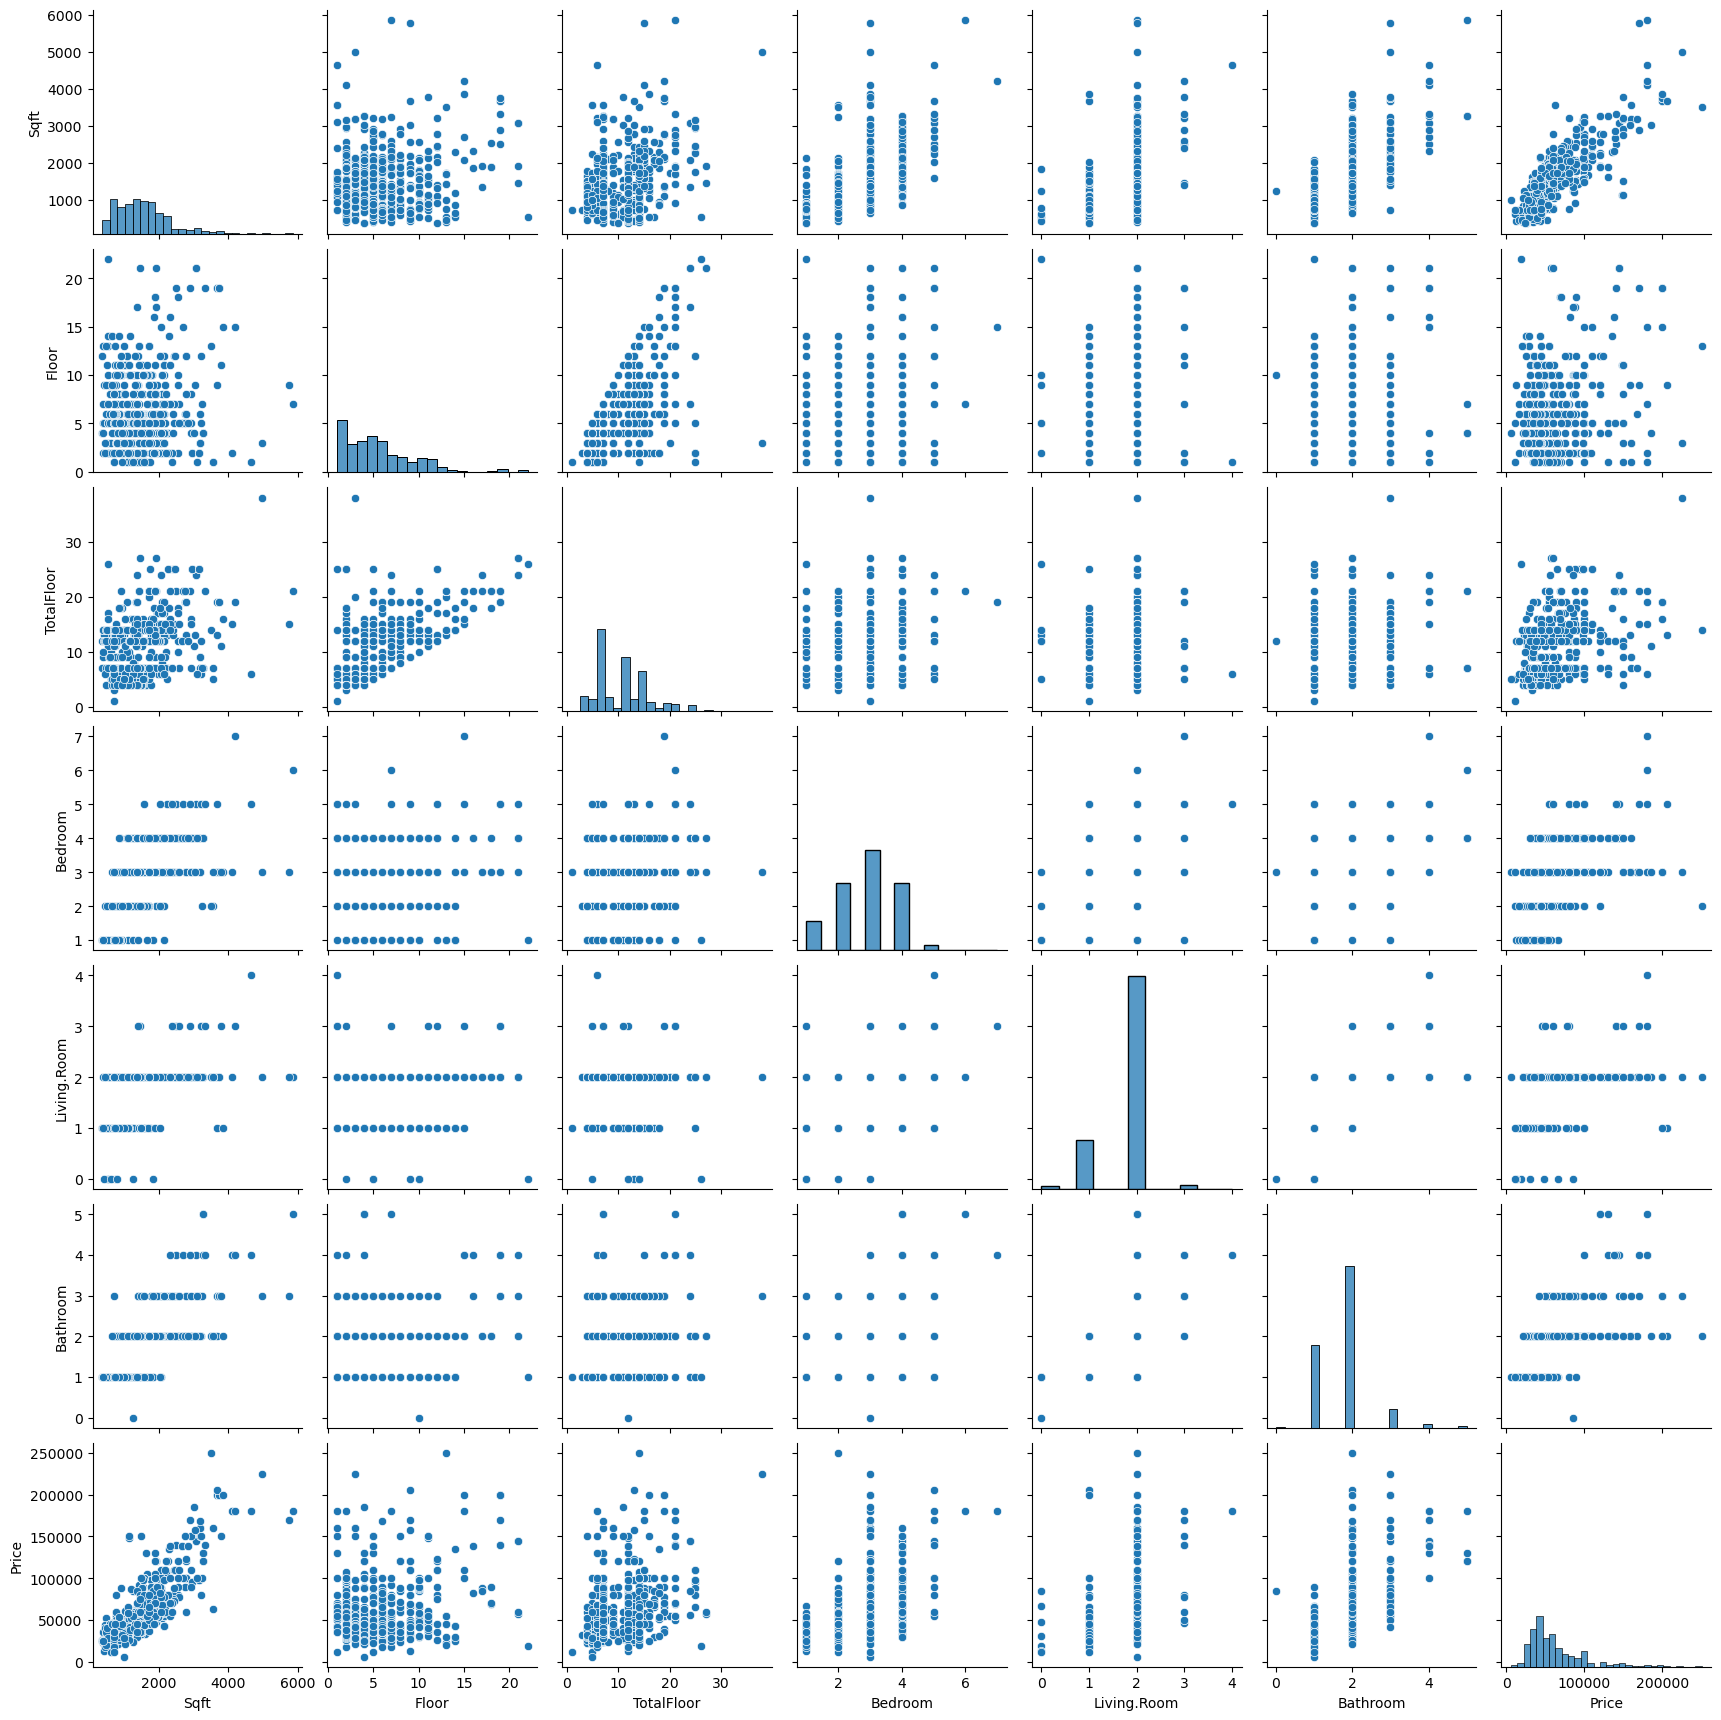

In [13]:
sb.pairplot(df)

<AxesSubplot:>

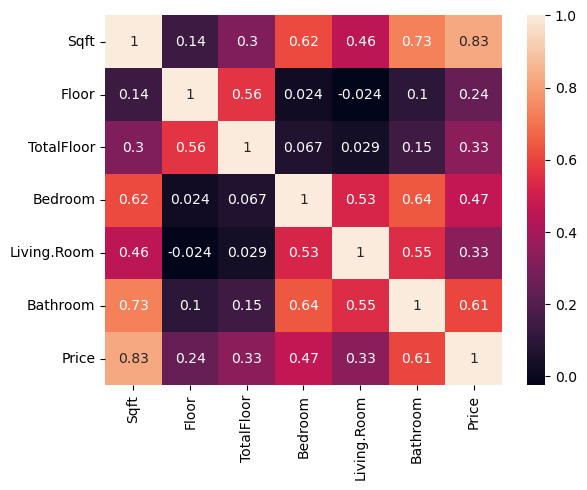

In [11]:
sb.heatmap(df.corr(),annot=True)

In [ ]:
#observation:  the data we can observe that the dependent column is price and all other attributes showing postive
             # correlation . 

# Data preprocessing

In [18]:
# missing value

df.isnull().sum()   # no missing values

Sqft           0
Floor          0
TotalFloor     0
Bedroom        0
Living.Room    0
Bathroom       0
Price          0
dtype: int64

In [ ]:
# No feature encoding needed all columns are numerical columns

In [19]:
#feature scaling

 # we need to scale the sqft  column
    
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()
mms

MinMaxScaler()

In [22]:
df["Sqft"]=mms.fit_transform(df[["Sqft"]])  # the data is scaled

# divide and split data

In [25]:
x=df.drop(["Price"],axis=1)
y=df["Price"]

In [26]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

# apply linear regression

In [29]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr

LinearRegression()

In [30]:
lr.fit(x_train,y_train)

LinearRegression()

In [32]:
y_pred=lr.predict(x_test)
y_pred


array([107973.11838704,  33378.77825804,  81818.07382898,  85206.99575616,
        32557.79553547, 109750.88883208, 121280.83641909,  65874.39680969,
        57136.1375659 ,  41907.39994403,  51383.81329414,  38001.0239091 ,
        20598.12141561,  54287.14668578,  47487.59775245,  81471.42298173,
        37271.11493859,  45753.10965867,  63133.35399333,  50759.51845557,
        24357.81422131, 171597.1085434 ,  78258.12811897,  93476.53561347,
        66308.59153058,  82154.00514998,  76289.08795872,  65431.62713899,
        75396.56376158,  61144.76404999,  89082.15633482,  34984.91279321,
        78954.99432982, 102848.19853371,  52994.52338688,  29738.37230358,
        66228.14190494,  68908.52663869,  57433.56248145,  58613.61820375,
        53751.36453097,  39997.91877112,  79587.65917933,  53331.53376964,
        78470.27905779,  44236.47552832,  67240.45412558,  30536.22792474,
       232777.29933208,  70528.64074536, 168085.40392615,  64234.48585056,
        38001.0239091 ,  

# evaluation

In [34]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.6431203072887992